In [27]:
from modsim import *

%matplotlib inline

In [50]:
rabbit_sys = System(t0 = 0, 
                t_end = 20,
                adult_pop0 = 10,
                juvenile_pop0 = 0,
                
                birth_rate = 0.9,
                death_rate = 0.5,
                mature_rate = 0.33)

In [48]:
def run_rabbit_simulation(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    adults = TimeSeries()
    adults[system.t0] = system.adult_pop0
    juveniles = TimeSeries()
    juveniles[system.t0] = system.juvenile_pop0
    
    for t in linrange(system.t0, system.t_end):
        births = system.birth_rate * adults[t]
        deaths = system.death_rate * adults[t]
        maturations = system.mature_rate * juveniles[t]
        
        juveniles[t+1] = juveniles[t] + births - deaths
        adults[t+1] = adults[t] + maturations - deaths
        
        
    system.adults = adults
    system.juveniles = juveniles

In [52]:
def plot_rabbit_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(system.adults, 'bo-', label='adults')
    plot(system.juveniles, 'ro-', label='juveniles')
    decorate(xlabel='Season', 
             ylabel='Rabbit population',
             title=title)

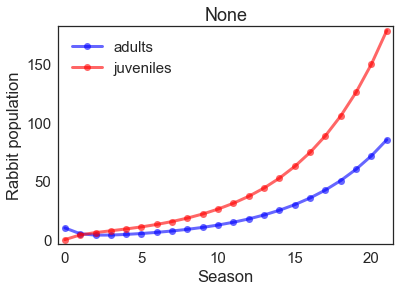

In [53]:
run_rabbit_simulation(rabbit_sys)
plot_rabbit_results(rabbit_sys)

In [164]:
def make_system(beta, gamma, total, infected):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(S=(total - infected), I=infected, R=0)
    pop = sum(init)
    init /= sum(init)
    
    
    
    t0 = 0
    t_end = 7 * 14

    return System(init=init, t0=t0, pop1=pop, t_end=t_end,
                  beta=beta, gamma=gamma)

In [152]:
tc = 3      # time between contacts in days 
tr = 4      # recovery time in days

beta = 1 / tc      # contact rate in per day
gamma = 1 / tr     # recovery rate in per day

#defines beta and gamma for make_system

In [160]:
sir.beta

0.3

In [161]:
sir = make_system(0.3, 0.25)
sir.pop1

90

In [60]:
def update1(state, system):
    """Update the SIR model.
    
    state: State with variables S, I, R
    system: System with beta and gamma
    
    returns: State object
    """
    s, i, r = state

    infected = system.beta * i * s    
    recovered = system.gamma * i
    
    s -= infected
    i += infected - recovered
    r += recovered
    
    return State(S=s, I=i, R=r)

In [162]:
def run_SIR_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add three Series objects to the System: S, I, R
    
    system: System object
    update_func: function that updates state
    """
    S = TimeSeries()
    I = TimeSeries()
    R = TimeSeries()
    S_pop = TimeSeries()
    I_pop = TimeSeries()
    R_pop = TimeSeries()

    state = system.init
    #change was made here, from system.init to init
    #init to winit
    t0 = system.t0
    S[t0], I[t0], R[t0] = state
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, system)
        S[t+1], I[t+1], R[t+1] = state
    
    S_pop = S * system.pop1
    I_pop = I * system.pop1
    R_pop = R * system.pop1
    system.S = S_pop
    system.I = I_pop
    system.R = R_pop
    

In [118]:
run_SIR_simulation(sir, update1)
sir.S*sum(init)

0     89.000000
1     88.670370
2     88.315811
3     87.934979
4     87.526556
5     87.089262
6     86.621879
7     86.123277
8     85.592436
9     85.028478
10    84.430695
11    83.798579
12    83.131854
13    82.430508
14    81.694816
15    80.925370
16    80.123101
17    79.289288
18    78.425576
19    77.533970
20    76.616832
21    75.676863
22    74.717075
23    73.740762
24    72.751451
25    71.752852
26    70.748804
27    69.743212
28    68.739985
29    67.742975
        ...    
70    47.967794
71    47.873228
72    47.785676
73    47.704637
74    47.629642
75    47.560255
76    47.496068
77    47.436702
78    47.381803
79    47.331042
80    47.284113
81    47.240733
82    47.200638
83    47.163583
84    47.129341
85    47.097701
86    47.068468
87    47.041460
88    47.016511
89    46.993464
90    46.972176
91    46.952514
92    46.934354
93    46.917583
94    46.902095
95    46.887792
96    46.874584
97    46.862388
98    46.851127
99    46.840729
Length: 100, dtype: floa

In [124]:
def plot_results(S, I, R):
    """Plot the results of a SIR model.
    
    S: TimeSeries
    I: TimeSeries
    R: TimeSeries
    """
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(R, ':', color='green', label='Recovered')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')

In [44]:
tc = 3      # time between contacts in days 
tr = 4      # recovery time in days

beta = 1 / tc      # contact rate in per day
gamma = 1 / tr     # recovery rate in per day

sir = make_system(beta, gamma)
run_SIR_simulation(sir, update1)


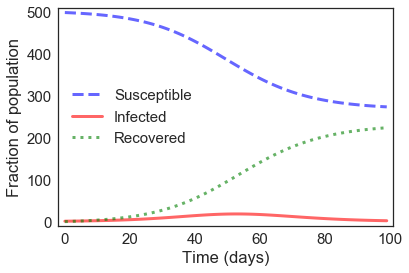

In [168]:
tc = 3      # time between contacts in days 
tr = 4      # recovery time in days

beta = 1 / tc      # contact rate in per day
gamma = 1 / tr     # recovery rate in per day

sir = make_system(beta, gamma, 500, 1)
run_SIR_simulation(sir, update1)

plot_results(sir.S, sir.I, sir.R)

In [41]:
run_SIR_simulation(sir, update1)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
